# Sprint 2

We will start by loading in all the images

In [3]:
import os
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
from PIL import Image

IMG_HEIGHT = 128
IMG_WIDTH = 128
img_folder = r'tripadvisor_dataset/tripadvisor_images/'

def create_dataset(img_folder, n=None):
    img_data_array = []
    files = os.listdir(os.path.join(img_folder))

    if n is None:
        n = len(files)
    
    counter = 0
    images = np.zeros((n, 128* 128* 3))
    for file in files:
        #print(file)
        if counter >= n:
            break
        try:
            image_path = os.path.join(img_folder, file)

            image = Image.open(image_path)
            print(image)
            
            # image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            image = np.array(image).flatten()
            images[counter] = image / 255

            counter += 1
            # image = cv2.imread(image_path, cv2.COLOR_BGR2GRAY)
            # image = np.array(image).flatten()
            # # print(type(image[0]))
            # image = image.astype('uint8')
            # print(image/255)
            # img_data_array.append(image/255)
        except Exception as e:
            print("file", file, "could not process:", e)
        

    return np.array(images)


In [4]:

images = create_dataset(img_folder, 1)
images

# import tensorflow as tf
# data_dir ='tripadvisor_dataset/tripadvisor_images/' 
# image = train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(128, 128))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x1E9EA458A00>


array([[0.02352941, 0.01960784, 0.03921569, ..., 0.86666667, 0.8627451 ,
        0.88627451]])

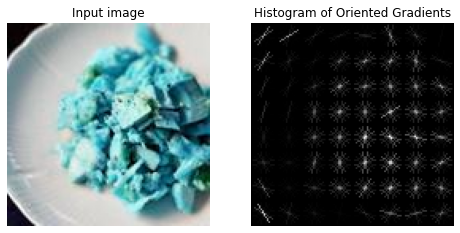

In [117]:
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# plt.imshow(images[0].reshape((128,128,3)))
img = images[0].reshape(128,128,3)

fd, hog_image = hog(img,orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()